In [210]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as pp
from sklearn.model_selection import KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
import matplotlib.pyplot as plt

In [211]:
# Dataset: Download the dataset from the link
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', names=[i for i in range(127)]) 
df.reset_index(inplace=True)
df.head(10)

,index,0,1,2,3,4,5,6,7,8,...,117,118,119,120,121,122,123,124,125,126
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
5,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14
6,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.05,0.08,0.06,?,?,?,?,0.00,?,0.03
7,6,?,?,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.01,0.33,0.00,?,?,?,?,0.00,?,0.55
8,21,?,?,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.04,0.17,0.04,?,?,?,?,0.00,?,0.53
9,29,?,?,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.00,0.47,0.11,?,?,?,?,0.00,?,0.15


In [212]:
# The dataset contains 127 features and target (Violent Crimes Per Population). 
# Pre-process the dataset as follows: 
# a. Drop: The first five attributes are non-predictive, hence drop them.
df = df.drop(['index', 0, 1, 2, 3], axis=1)
df.head()

,4,5,6,7,8,9,10,11,12,13,...,117,118,119,120,121,122,123,124,125,126
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [213]:
# b. Missing Value Imputation: Dataset contains a lot of missing values in it. 
#    Missing values are represented using “?”.
df.replace(to_replace={'?':np.nan}, inplace=True)  
df = df.astype(np.float64)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.head()

,4,5,6,7,8,9,10,11,12,13,...,117,118,119,120,121,122,123,124,125,126
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


In [214]:
# c. Define X matrix (independent features) and y vector (target feature).
X = np.array(df.iloc[:, :-1])
y = np.array(df.iloc[:, -1])

In [215]:
# 2. Perform K-Fold cross validation on the performance of a Linear Regression 
#    model. The general procedure is defined as follows: 
#     a. Shuffle the dataset randomly.
#     b. Split the dataset into k=5 groups
kf = KFold(5, shuffle=True)

In [216]:
#     c. For each unique group:
#        i. Take the group as a hold out or test data set
listOfMSE = []
listOfAE = []
listOfMAE = []
listOfR2 = []

for train, test in kf.split(X, y):
    model = LinearRegression()
    #    ii. Take the remaining groups as a training data set
    #    iii. Fit a model on the training set and evaluate it on the test set
    model.fit(X[train], y[train])
    y_pred = model.predict(X[test])
    #    iv. Retain the evaluation scores such as such as mean squared error, mean 
    #        absolute error, median absolute error, R2 score.
    listOfMSE.append(mean_squared_error(y[test], y_pred))
    listOfAE.append(mean_absolute_error(y[test], y_pred))
    listOfMAE.append(median_absolute_error(y[test], y_pred))
    listOfR2.append(r2_score(y[test], y_pred))
    del model

print("The average skill of the model based on all 4 statistics:")
print(f"Mean Squared Error: {np.mean(listOfMSE)}")
print(f"Mean Absolute Error: {np.mean(listOfAE)}")
print(f"Median Absolute Error: {np.mean(listOfMAE)}")
print(f"R2 Scores: {np.mean(listOfR2)}")

The average skill of the model based on all 4 statistics:
Mean Squared Error: 0.3875084117715707
Mean Absolute Error: 0.11216228216439664
Median Absolute Error: 0.06686127919652717
R2 Scores: -5.988058471418177


In [217]:
lr = LinearRegression()
r2list = []

# without k-fold
lr.fit(X, y)
y_pred = lr.predict(X)
r2list.append(mean_squared_error(y_pred, y))
# with 5 folds
r2list.append(-cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5).mean())
# with 10 folds
r2list.append(-cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=10).mean())

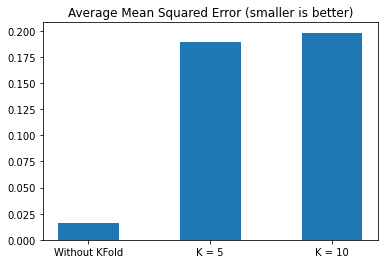

In [218]:
plt.bar(['Without KFold','K = 5','K = 10'], r2list, width=0.5)
plt.title('Average Mean Squared Error (smaller is better)')
plt.show()